In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The aim of this project is to identify the level of income qualification needed for the families in Latin America using
# RandomForest model

In [398]:
train_df = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Machine learning/project to be submitted/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/train.csv")

test_df = train_df = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Machine learning/project to be submitted/Machine-Learning--Projects-master/Projects/Projects for Submission/Project 2 - Income Qualification/Dataset for the project/test.csv")

In [320]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [321]:
train_df.describe(include="all")

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_a7ea7786e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


In [322]:
train_df.shape

(9557, 143)

In [323]:

x = list(train_df.isnull().sum())
for index, val in enumerate(x):
    if val > 0:
        print(index, val)


1 6860
8 7342
21 7928
103 5
140 5


In [324]:
train_df.iloc[:, [1, 8, 21, 103, 140]]

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
0,190000.0,NaN,NaN,10.00,100.0000
1,135000.0,1.0,NaN,12.00,144.0000
2,NaN,NaN,NaN,11.00,121.0000
3,180000.0,1.0,1.0,11.00,121.0000
4,180000.0,1.0,NaN,11.00,121.0000
...,...,...,...,...,...
9552,80000.0,NaN,NaN,8.25,68.0625
9553,80000.0,NaN,NaN,8.25,68.0625
9554,80000.0,NaN,NaN,8.25,68.0625
9555,80000.0,NaN,NaN,8.25,68.0625


## These columns have missing values

# Output variable

In [325]:
output = train_df["Target"]
output

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

<AxesSubplot:>

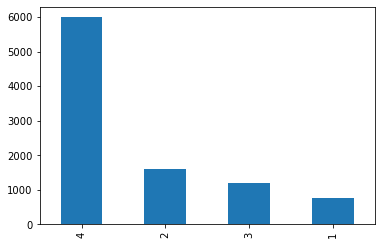

In [332]:
barplot = train_df["Target"].value_counts()
barplot.plot.bar()

## Bar plot resutls show the data is not uniformly distributed and showed bias towards level 4

# Identify type of data

In [333]:

train_df.info

<bound method DataFrame.info of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedj

In [335]:
dtype = train_df.dtypes
dtype = pd.DataFrame(dtype)
dtype

,0
Id,object
v2a1,float64
hacdor,int64
rooms,int64
hacapo,int64
...,...
SQBovercrowding,float64
SQBdependency,float64
SQBmeaned,float64
agesq,int64


In [336]:
dtype.iloc[:, 0].unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [337]:
print("The columns thata are object type:", dtype[dtype.iloc[:,0]=="object"])
print("The columns thata are float type:", dtype[dtype.iloc[:,0]=="float64"])
print("The columns thata are int type:", dtype[dtype.iloc[:,0]=="int64"])

           

The columns thata are object type:                  0
Id          object
idhogar     object
dependency  object
edjefe      object
edjefa      object
The columns thata are float type:                        0
v2a1             float64
v18q1            float64
rez_esc          float64
meaneduc         float64
overcrowding     float64
SQBovercrowding  float64
SQBdependency    float64
SQBmeaned        float64
The columns thata are int type:                     0
hacdor          int64
rooms           int64
hacapo          int64
v14a            int64
refrig          int64
...               ...
SQBhogar_total  int64
SQBedjefe       int64
SQBhogar_nin    int64
agesq           int64
Target          int64

[130 rows x 1 columns]


##  Check if there are any biases in your dataset

<AxesSubplot:>

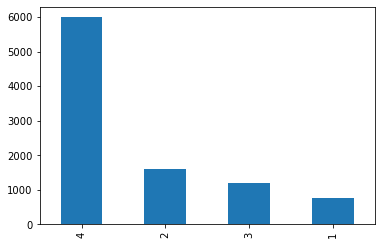

In [338]:
train_df["Target"].value_counts().plot.bar()

## The graph above shows the data are imbalance and showed more data for level 4.

# Check whether all members of the house have the same poverty level.

In [339]:
equal_train_df =train_df.groupby("idhogar")["Target"].apply(lambda x: x.nunique()==1)
equal_train_df

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [340]:
not_equal_train_df = equal_train_df[equal_train_df!=True]

print("The number of households not have same poverty level is:", len(not_equal_train_df))

The number of households not have same poverty level is: 85


# Check if there is a house without a family head

In [341]:
househead_df = train_df.groupby("idhogar")["parentesco1"].sum()
househead_missing

househead_missing_df = train_df.loc[train_df['idhogar'].isin(househead_df[househead_df == 0].index)]

In [342]:
print('There are {} households without a head.'.format(househead_missing_df['idhogar'].nunique()))

There are 15 households without a head.


# Check whether all members of the house have the same poverty level

In [343]:
female_group =  train_df["Target"].groupby(train_df["female"]).value_counts()
female_group 

female  Target
0       4         2976
        2          741
        3          577
        1          326
1       4         3020
        2          856
        3          632
        1          429
Name: Target, dtype: int64

(<AxesSubplot:xlabel='male,Target'>,
 <matplotlib.legend.Legend at 0x1fed23ffca0>)

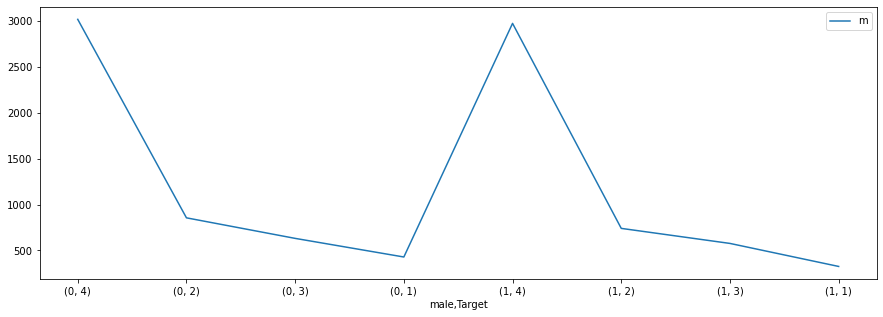

In [344]:
plt.figure(figsize=(15,5))

train_df["Target"].groupby(train_df["male"]).value_counts().plot.line(), plt.legend("male")


(<AxesSubplot:xlabel='female,Target'>,
 <matplotlib.legend.Legend at 0x1fed2449fa0>)

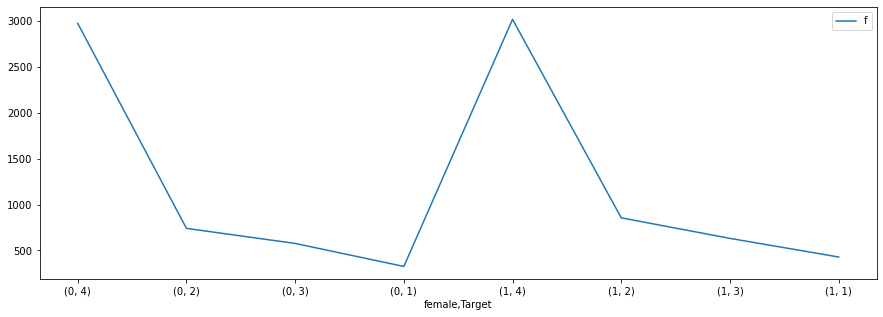

In [345]:
plt.figure(figsize=(15,5))
train_df["Target"].groupby(train_df["female"]).value_counts().plot.line(), plt.legend("female")


## The line plot shows that there is variablity in poverty level across age group in a house

# Set the poverty level of the members and the head of the house same in a family

In [346]:
for members in not_equal_train_df.index:
    target_1 = int(train_df[(train_df["idhogar"]==members) & (train_df["parentesco1"]==1.0)]["Target"])
    
    train_df.loc[train_df['idhogar'] == members, 'Target'] = target_1
    
equal_train_df = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = equal_train_df[equal_train_df != True]

print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


# Counts null values

In [352]:
null_values = train_df.isnull().sum()
null_values.reset_index
lst = []
for index, val in null_values.items():
    if val > 0:
        print("The column {} contains {} null values:".format(index,val))


In [353]:
train_df["Target"].isnull().sum()

0

# Remove null value rows of the target variable

In [370]:
train_na_filt_df = train_df.dropna(how="any", axis=0)
test_na_filt = test_df.dropna(how="any", axis=0)

In [357]:
train_na_filt_df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.00,289,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0000,121.00,64,4
75,ID_dd93e20ec,350000.0,0,6,0,1,1,1,3.0,0,...,100,289,9,256,1,1.000000,0.2500,272.25,289,4
130,ID_651377e3e,260000.0,0,5,0,1,1,1,3.0,1,...,1,49,16,100,4,4.000000,1.0000,90.25,49,4
133,ID_272bdf973,260000.0,0,5,0,1,1,1,3.0,1,...,36,169,16,100,4,4.000000,1.0000,90.25,169,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,ID_6edc54f34,100000.0,0,6,0,1,1,1,1.0,1,...,9,81,25,289,9,1.562500,2.2500,361.00,81,4
9037,ID_b7815bb34,150000.0,0,7,0,1,1,1,1.0,0,...,4,64,16,121,4,1.000000,1.0000,196.00,64,4
9039,ID_6019368cd,150000.0,0,7,0,1,1,1,1.0,0,...,100,256,16,121,4,1.000000,1.0000,196.00,256,4
9066,ID_cec76e220,40000.0,0,4,0,1,1,1,1.0,1,...,4,81,16,121,4,1.777778,1.0000,121.00,81,4


In [372]:
test_na_filt.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Length: 142, dtype: int64

In [358]:
train_na_filt_df.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64

318      .25
335      yes
486      .75
498       .5
540      .75
        ... 
22619    1.5
23091    yes
23335    yes
23579    1.5
23583    1.5
Name: dependency, Length: 448, dtype: object

# Predict the accuracy using random forest classifie

In [359]:
X = train_na_filt_df.drop("Target", axis=1)
y = train_na_filt_df["Target"]

In [376]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["dependency"] = le.fit_transform(X["dependency"])
X["edjefe"] = le.fit_transform(X["edjefe"])
X["edjefa"] = le.fit_transform(X["edjefa"])


test_na_filt["dependency"] = le.fit_transform(test_na_filt["dependency"])
test_na_filt["edjefe"] = le.fit_transform(test_na_filt["edjefe"])
test_na_filt["edjefa"] = le.fit_transform(test_na_filt["edjefa"])

In [380]:
X = X.drop(["Id", "idhogar"], axis=1)

test_data = test_na_filt.drop(["Id", "idhogar"], axis=1)

In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [382]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (124, 140)
The shape of X_test is: (32, 140)
The shape of y_train is: (124,)
The shape of y_test is: (32,)


In [383]:
X_train.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
v2a1,1.000000,-0.062759,0.431479,-0.029847,NaN,NaN,NaN,0.422464,-0.045279,-0.114391,...,0.053647,0.046204,0.053373,-0.078065,0.497841,0.011902,-0.150800,-0.039269,0.413670,0.053373
hacdor,-0.062759,1.000000,-0.258360,0.572637,NaN,NaN,NaN,-0.092480,-0.046000,0.168770,...,-0.095398,-0.109007,-0.099034,0.354922,-0.106219,-0.066710,0.794403,-0.069258,-0.162897,-0.099034
rooms,0.431479,-0.258360,1.000000,-0.020104,NaN,NaN,NaN,0.258110,-0.082638,0.196507,...,0.198412,0.189596,0.197959,0.315343,0.419208,0.382274,-0.374783,0.133034,0.326951,0.197959
hacapo,-0.029847,0.572637,-0.020104,1.000000,NaN,NaN,NaN,-0.052957,0.065667,0.394380,...,-0.034705,-0.060303,-0.043727,0.677344,-0.093046,-0.038201,0.391385,-0.062693,-0.094914,-0.043727
v14a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,0.011902,-0.066710,0.382274,-0.038201,NaN,NaN,NaN,0.149937,0.023769,0.226490,...,0.067993,0.069411,0.064105,0.522569,0.197646,1.000000,0.182587,0.549630,0.204208,0.064105
SQBovercrowding,-0.150800,0.794403,-0.374783,0.391385,NaN,NaN,NaN,-0.055397,-0.005391,0.180925,...,-0.130907,-0.158291,-0.139539,0.420313,-0.134397,0.182587,1.000000,0.029114,-0.197906,-0.139539
SQBdependency,-0.039269,-0.069258,0.133034,-0.062693,NaN,NaN,NaN,-0.067621,-0.053416,-0.253360,...,-0.028957,-0.029648,-0.034056,0.061840,-0.111610,0.549630,0.029114,1.000000,0.024904,-0.034056
SQBmeaned,0.413670,-0.162897,0.326951,-0.094914,NaN,NaN,NaN,0.194514,-0.067811,-0.010833,...,0.054343,0.083396,0.054411,-0.012241,0.672409,0.204208,-0.197906,0.024904,1.000000,0.054411


In [384]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [385]:
rfc_pred_test = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)


In [386]:
from sklearn.metrics import accuracy_score

In [387]:
print("The accuracy of the test prediction is:", accuracy_score(y_test, rfc_pred_test))
print("The accuracy of the train prediction is:", accuracy_score(y_train, rfc_pred_train))

The accuracy of the test prediction is: 1.0
The accuracy of the train prediction is: 1.0


In [388]:
## provided test data set


In [406]:
print("The shape of the test data set is:", test_data.shape)

The shape of the test data set is: (448, 140)


# making similar shape to train dataset

In [403]:
test_data_filt = test_data.sample(n=32)

In [407]:
print("The shape of the filter test data set is:", test_data_filt.shape)

The shape of the filter test data set is: (32, 140)


## predicting trained model for separate test data provided

In [404]:
rfc_pred_testdata = rfc.predict(test_data_filt)

In [405]:
print("The accuracy of the test prediction is:", accuracy_score(y_test, rfc_pred_testdata))

The accuracy of the test prediction is: 0.9375


In [415]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
print(confusion_matrix(y_test, rfc_pred_test))
print(classification_report(y_test, rfc_pred_testdata))

[[ 1  0  0]
 [ 0  1  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       0.94      1.00      0.97        30

    accuracy                           0.94        32
   macro avg       0.31      0.33      0.32        32
weighted avg       0.88      0.94      0.91        32



# Check accuracy using cross validation with random forest

In [420]:
from sklearn.model_selection import KFold, cross_val_score


In [434]:
rfc_model_cross_val = RandomForestClassifier()
cross_val_score(rfc_model_cross_val,X, y, cv=10, scoring="accuracy" )

array([0.875     , 0.8125    , 0.875     , 0.9375    , 0.875     ,
       0.9375    , 0.93333333, 1.        , 1.        , 0.86666667])

## The maximum accuracy is 1

In [435]:
print("The mean accuracy of the rfc model is:", cross_val_score(rfc_model_cross_val, X , y , cv = 10 , scoring ="accuracy").mean())

The mean accuracy of the rfc model is: 0.9112500000000001


## Fitting model to train data set and checking top features that influence the model

In [437]:
rfc_model_cross_val.fit(X, y)
test_data_1 = test_data.sample(n=156)
y_predict_test_data = rfc_model_cross_val.predict(test_data_1)

In [438]:
y_predict_test_data 

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [442]:
rfc_model_cross_val.fit(X,y)
labels = list(X)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rfc_model_cross_val.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head(10)

,feature,importance
0,v2a1,0.051731
2,rooms,0.015555
9,r4h2,0.016582
10,r4h3,0.016545
11,r4m1,0.031576
12,r4m2,0.020467
14,r4t1,0.023725
15,r4t2,0.018369
19,escolari,0.019711
22,paredblolad,0.020364


Text(0.5, 0, 'Importance')

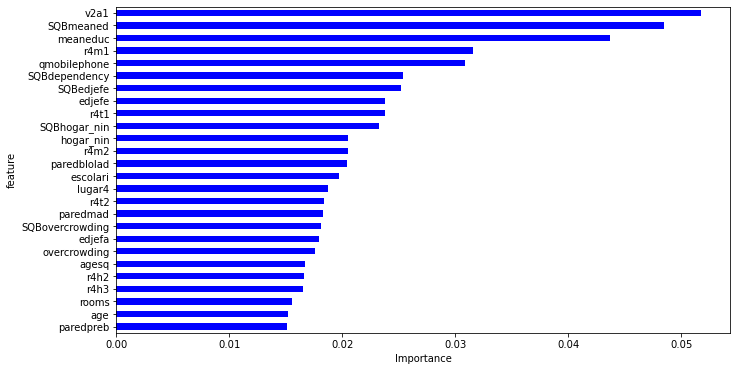

In [443]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# From the graph above v2a1, SQBmeaned, meaneduc, r4m1 has the greatest influence on the rfc model.